In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# **Atomic Lines Spectroscopy** #

November 28th, 2022

 **2663452m**

## Experiment Aims ##

The Aim of this lab was, to understand how spectra are produced by diffraction gratings, and to employ that understanding in order to identify the atomic species present in a glowing gas.

To do this the following tasks were set out for us.

- First was to set up and verify that the equipment was working and that we understood how to correctly procede with the later sections. We 
did this with the use of of Equation 1 and the data in Table 1 of the labscript to work out the expected values.

- We were then asked to investigate the resolving power of the spectrometer using two emission lines of a gas that were close together.

- The third task was to construct a plot of angular deflection versus wavelength and then calculate the angular dispersion of the emission lines.

- And finally to analyse a unknown source, and deduce its atomic composition based on our reference plot in task 3. 



Useful equations for this experiment are listed below.

$$ d\sin(\theta) = m\lambda $$ 
(Equation 1)

$$ R = \frac{\lambda}{\Delta\lambda} = Nm $$
(Equation 2)

$$ Theorectical Grating Response Width = \frac{\lambda}{Nd}$$
(Equation 3)


##

### Task 1 ###

In this task we are asked to observe the angle at which specific visible emission lines of known wavelength occur, and reference these lines against the angle expected from the wavelength given in Table 1 of the labscript. By checking these Angles for specific wavelength, depending on how accurate the experimentally deteremined values are, tells us how well the experiment was conducted.

### Task 2 ###

The theorectical resolving power of the spectrometer is given by Equation 2, where $\lambda$ is the wavelength of the emission line, $\Delta\lambda$ is the smallest resolvable wavelength between the two lines, and $N$ is the number of illuminated lines of the diffraction grating and m is the diffraction order.

####  Task 2.1 ####

For this task we are asked to calculate the theorectical resolving power using the wavelengths of two emission lines of a gas that are close together. The gas used in this experiment was helium, and the two lines used were 501.57nm and 504.77nm. The values for these lines are given in Table 1 of the labscript.


In [2]:
lam1 = 501.57
lam2 = 504.77
lam = np.mean([lam1, lam2])/2
dellam = abs((lam1-lam2)/2)

R = lam/dellam
print(f'The Theorectical resolving power of the diffreaction grating is R = {R:.3f}') 

The Theorectical resolving power of the diffreaction grating is R = 157.241


#### Task 2.2 ####

In this task it asks us to calculate and compare the Theorectical Grating response width of the first order fringes using the wavelengths given in Table 1 and Equation 3 and compare it against the angular width of the spectrometer slit as calculated using trigionometry and known distances.

In [3]:
lambdadata = np.loadtxt('lambdadata.txt',delimiter = ',')
sortlambda = np.sort(lambdadata)

y = [0]

N = R
d = 1/6e5
# print(N)
for x in lambdadata:
    x*1e-9/(N*d)
    z = x*10e-9/(N*d)
    y.append((x*10e-9)/(N*d))
    angwidth = np.arctan(0.239/z)
    print(f'The Observable diameter of the primary maxima of wavelength {x:.2f}nm is {z:.6f}m and an angular width of {angwidth:.6f} Degrees')
    
# print(y)


# print(f'The angular width of the primary maxima of wavelength {x}nm is {y} degrees')


D = 0.239 #m
k = ((1/6e5)) #m
theta = np.arctan(D/k)
print(f'The angular width of the spectrometer slit geometrically is {theta:.4f} ± 0.01 Degrees')

xx = (theta*np.pi/180)
# print(xx)



The Observable diameter of the primary maxima of wavelength 402.60nm is 0.015362m and an angular width of 1.506607 Degrees
The Observable diameter of the primary maxima of wavelength 438.79nm is 0.016743m and an angular width of 1.500855 Degrees
The Observable diameter of the primary maxima of wavelength 455.55nm is 0.017383m and an angular width of 1.498192 Degrees
The Observable diameter of the primary maxima of wavelength 459.32nm is 0.017527m and an angular width of 1.497594 Degrees
The Observable diameter of the primary maxima of wavelength 460.38nm is 0.017567m and an angular width of 1.497425 Degrees
The Observable diameter of the primary maxima of wavelength 471.31nm is 0.017984m and an angular width of 1.495690 Degrees
The Observable diameter of the primary maxima of wavelength 492.19nm is 0.018781m and an angular width of 1.492376 Degrees
The Observable diameter of the primary maxima of wavelength 412.08nm is 0.015724m and an angular width of 1.505099 Degrees
The Observable d

The Grating response curve compared to the angular width of the slit is slightly off as the observable resolution has some uncertainties associated with it and therefore produces a smaller than would be expected.

### Task 3 ###


#### Task 3.1 ####

In this task we are asked to construct a plot of angular deflection versus wavelength and then calculate the angular dispersion $\frac{d\theta}{d\lambda}$ of the emission lines for different values of $\lambda$.

This can be acheived by using the scip.curve_fit function to fit a linear function to the graph of angular deflection versus wavelength. As shown below. And then determine the value of d (the slit seperation distance) from the slope of the line.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.constants as const

#Import Packages


In [5]:
data_helium = np.loadtxt('helium.txt',delimiter=',')
data_krypton = np.loadtxt('krypton.txt',delimiter=',')
data_xenon = np.loadtxt('xenon.txt',delimiter=',')

thetah = (data_helium[:,1])
lamh = (data_helium[:,0])
thetak = np.deg2rad(data_krypton[:,1])
lamk = (data_krypton[:,0])
thetax = np.deg2rad(data_xenon[:,1])
lamx = (data_xenon[:,0])



#Import Data and seperate


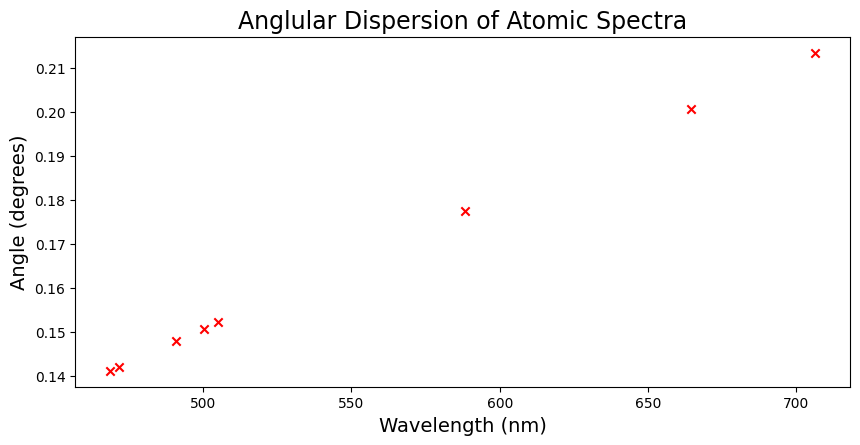

In [6]:
axes_textsize = 14
title_textsize = 17


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.scatter(lamh,thetah, marker = 'x', color = 'red')
plt.grid = True
plt.xlabel('Wavelength (nm)', fontsize = axes_textsize)
plt.ylabel('Angle (degrees)', fontsize = axes_textsize)
plt.title('Anglular Dispersion of Atomic Spectra', fontsize = title_textsize)


plt.show()

Equation of calibration of the line is theta =0.000305λ + -0.001800
The slit seperation is 0.000305


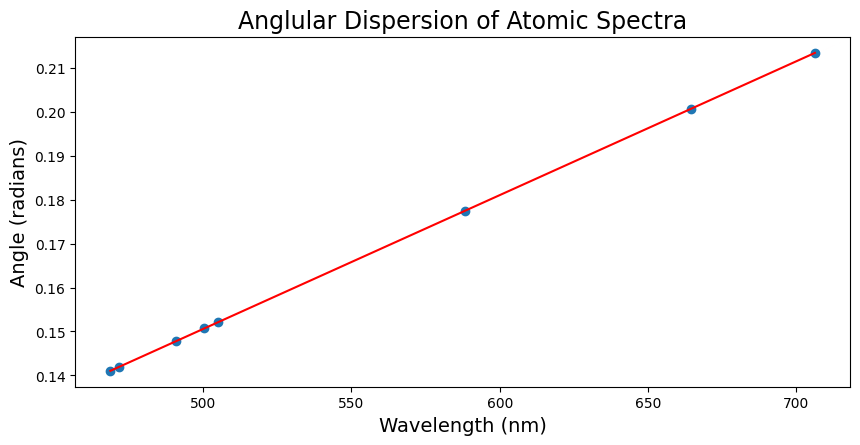

In [7]:
alltheta = np.concatenate((thetah,thetak,thetax))
alllam = np.concatenate((lamh,lamk,lamx))

def angular_dispersion(x,m,b):    #define function for linear fit
    return m*x+b

popt, pcov = sp.optimize.curve_fit(angular_dispersion, lamh, thetah, p0 = [1,1])   #function to data
m = popt[0]
b = popt[1]



plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.scatter(lamh,thetah)
plt.xlabel('Wavelength (nm)', fontsize = axes_textsize)
plt.ylabel('Angle (radians)', fontsize = axes_textsize)
plt.title('Anglular Dispersion of Atomic Spectra', fontsize = title_textsize)
plt.grid = True
plt.plot(lamh,angular_dispersion(lamh,popt[0],popt[1],),'r-')

print(f'Equation of calibration of the line is theta ={m:.6f}λ + {b:.6f}')
print(f'The slit seperation is {m:.6f}')

Equation of calibration line is theta =321.975647 x + 43.725331
the slit seperation 321.975647nm


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


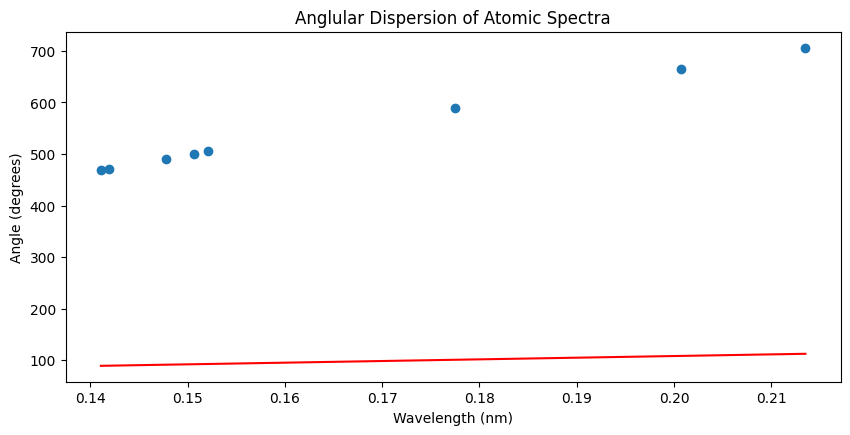

In [8]:
def angular_dispersion(thetah,m,b,c):
    return m*theta+b

popt, pcov = sp.optimize.curve_fit(angular_dispersion, thetah, lamh)
m = popt[0]
b = popt[1]
y = m*thetah+b


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.scatter(thetah,lamh,)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Angle (degrees)')
plt.title('Anglular Dispersion of Atomic Spectra')
plt.grid = True
plt.plot(thetah,y,'r-')

print(f'Equation of calibration line is theta ={m:.6f} x + {b:.6f}')
print(f'the slit seperation {m:.6f}nm')

Difference between hydrogen and others is there is only two discrete bands visisble the others are faint or not visible at all

In [9]:
data2 = np.loadtxt('unknown.txt',delimiter=',')
theta2 = np.deg2rad(data2)
print (theta2)
lam2 = (theta2)/m
print(lam2)

[0.13322098 0.1402023  0.14428637 0.15329227 0.15940092 0.16261233
 0.19490092]
[0.00041376 0.00043544 0.00044813 0.0004761  0.00049507 0.00050505
 0.00060533]


In [10]:
import sys
if "\your\path\to\xelatex" in sys.path:
    print('adding path') # I just add this to know if the path was present or not.
    sys.path.append("\your\path\to\xelatex")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 13-15: truncated \xXX escape (516694318.py, line 2)